# House Prices prediction 🏘️

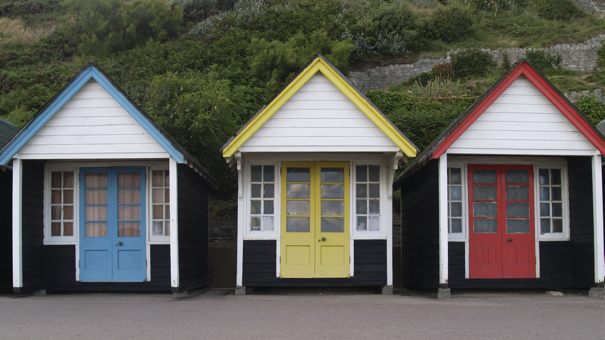

## About the Dataset

This Dataset Contains Houses that has been sold out.

Our Target in this model to pridect the prices of the houses based on:


*   Squarefootage
*   number of Bedrooms
*   number of Bathrooms

Using Linear Regression


In [1]:
# importing Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact



## Exploraty Data Analysis

### Loading the Data

In [2]:
train = pd.read_csv("/content/Data/train.csv")
test = pd.read_csv("/content/Data/test.csv")
print("Full Train Dataset is: ", train.shape)
print("Full Test Dataset is: ", test.shape)

Full Train Dataset is:  (1460, 81)
Full Test Dataset is:  (1459, 80)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions

In [3]:
train.info()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data preprocessing

Our target is training the model based on:
* Squarefootage
* number of Bedrooms
* number of Bathrooms

So we don't need all 81 columns we only need the columns related to our target

**Making a function to handle our data to our resired target**

In [4]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  # Mask Features
  if "SalePrice" in df:
    mask_features = ["SalePrice", "LotArea" ,"TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr"]
    df = df[mask_features]
  else:
    mask_features = ["LotArea", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr"]
    df = df[mask_features]


  df["Bedrooms"] = df["BedroomAbvGr"]
  df.drop(columns="BedroomAbvGr", inplace=True)

  # Adding Bathrooms together
  df["Bathrooms"] = df["BsmtFullBath"] + df["BsmtHalfBath"] + df["FullBath"] + df["HalfBath"]
  df.drop(columns=["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], inplace=True )




  #Remove outliers by trimming the bottom and top 10% of "surface_covered_in_m2"
  low = df["LotArea"].quantile(0.1)
  high = df["LotArea"].quantile(0.9)
  mask_area = df["LotArea"].between(low, high)
  df = df[mask_area]
  return df

def drop_outliers(df, field_name):
    q1 = np.percentile(df[field_name], 25)
    q3 = np.percentile(df[field_name], 75)
    iqr = 1.5 * (q3 - q1)
    upper_bound = q3 + iqr
    lower_bound = q1 - iqr
    df.drop(df[(df[field_name] > upper_bound) | (df[field_name] < lower_bound)].index, inplace=True)
    return df





In [5]:
train = wrangle("/content/Data/train.csv")
test = wrangle("/content/Data/test.csv")
print("Subset Train Dataset is: ", train.shape)
print("Subset Test Dataset is: ", test.shape)

Subset Train Dataset is:  (1172, 5)
Subset Test Dataset is:  (1167, 4)


In [6]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1172 non-null   int64
 1   LotArea      1172 non-null   int64
 2   TotalBsmtSF  1172 non-null   int64
 3   Bedrooms     1172 non-null   int64
 4   Bathrooms    1172 non-null   int64
dtypes: int64(5)
memory usage: 54.9 KB


,SalePrice,LotArea,TotalBsmtSF,Bedrooms,Bathrooms
0,208500,8450,856,3,4
1,181500,9600,1262,3,3
2,223500,11250,920,3,4
3,140000,9550,756,3,2
4,250000,14260,1145,4,4


In [7]:
train[["SalePrice", "LotArea"]].describe()

,SalePrice,LotArea
count,1172.000000,1172.000000
mean,176632.412969,9547.709898
std,71935.262488,2158.671490
min,34900.000000,5000.000000
25%,128987.500000,8024.750000
50%,159500.000000,9468.500000
75%,208350.000000,11053.750000
max,611657.000000,14375.000000


Looking at the Mathmatical information function describe gives us we can clearly see that there are outliers in our data.

> Let's See the Graphs



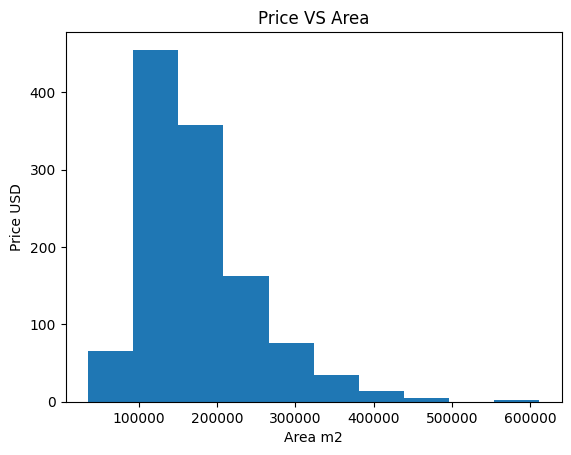

In [8]:
plt.hist(train["SalePrice"])
plt.xlabel("Area m2")
plt.ylabel("Price USD")
plt.title("Price VS Area");


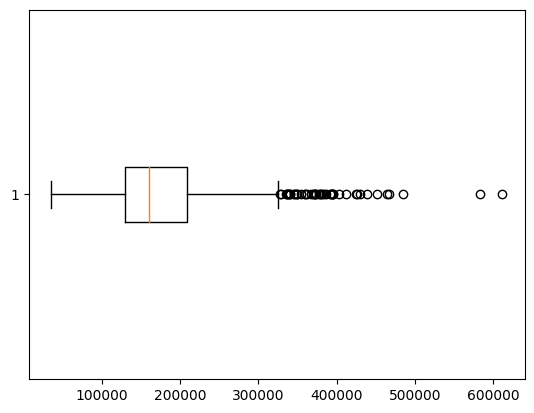

In [9]:
plt.boxplot(train["SalePrice"], vert=False)
plt.show()

> As the Graphs shows the Data is skewed And Contains outliers




In [10]:
df = drop_outliers(train, "SalePrice")

In [11]:
mean_price = df["SalePrice"].mean().round(2)
mean_area = df["LotArea"].mean().round(2)
max = df["SalePrice"].max()
min = df["SalePrice"].min()
max_ar = df["LotArea"].max()
min_ar = df["LotArea"].min()
print(f"Mean price of houses is: ${mean_price} USD")
print(f"Max price is: ${max} USD,  and Min price is: ${min} USD ")
print()
print(f"Mean Area of houses is: ${mean_area} m2")
print(f"Max Area is: {max_ar} m2,  and Min Area is: {min_ar} m2 ")

Mean price of houses is: $167563.26 USD
Max price is: $325624 USD,  and Min price is: $34900 USD 

Mean Area of houses is: $9455.54 m2
Max Area is: 14375 m2,  and Min Area is: 5000 m2 


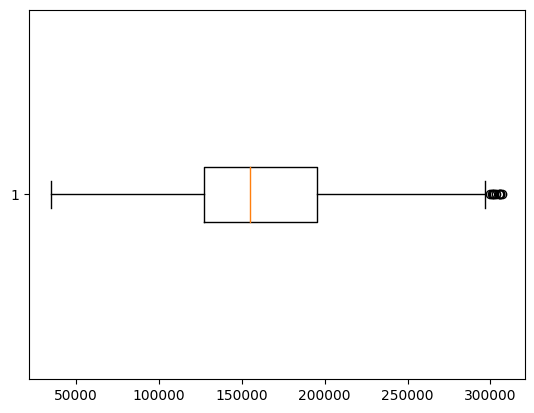

Ourliers Has been Removed


In [12]:
df = drop_outliers(train, "SalePrice")
plt.boxplot(df["SalePrice"], vert = False)
plt.show()
print("Ourliers Has been Removed")

### Data visualization

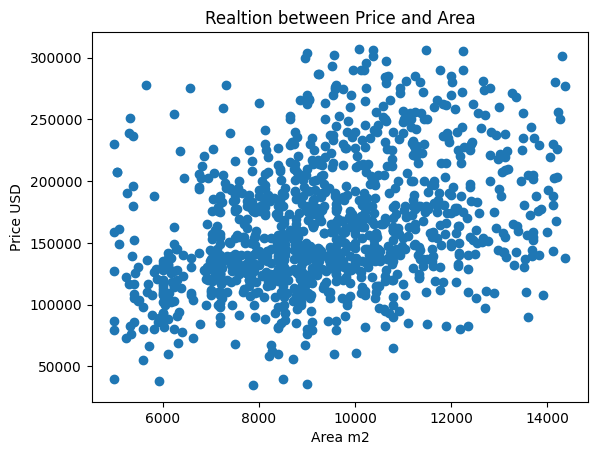

In [13]:
plt.scatter(x=df["LotArea"], y=df["SalePrice"])
plt.xlabel("Area m2")
plt.ylabel("Price USD")
plt.title("Realtion between Price and Area")
plt.show();

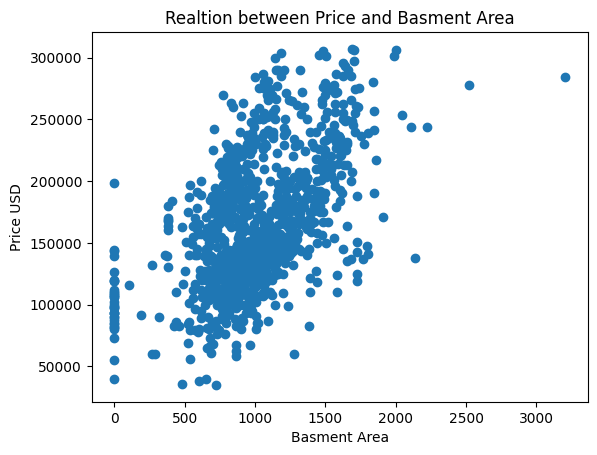

In [14]:
plt.scatter(x=df["TotalBsmtSF"], y=df["SalePrice"])
plt.xlabel("Basment Area")
plt.ylabel("Price USD")
plt.title("Realtion between Price and Basment Area")
plt.show();

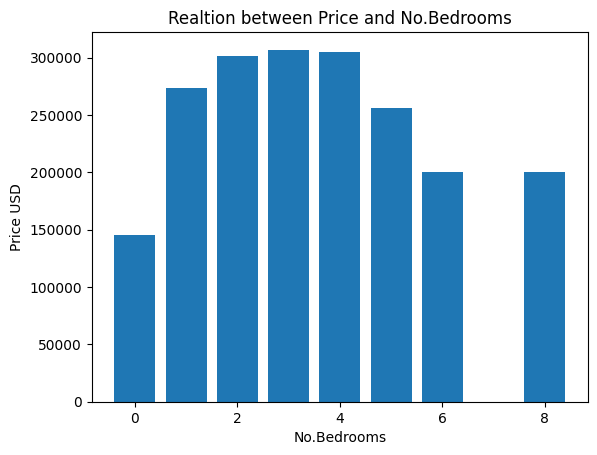

In [15]:
plt.bar(x=df["Bedrooms"], height=df["SalePrice"])
plt.xlabel("No.Bedrooms")
plt.ylabel("Price USD")
plt.title("Realtion between Price and No.Bedrooms")
plt.show();

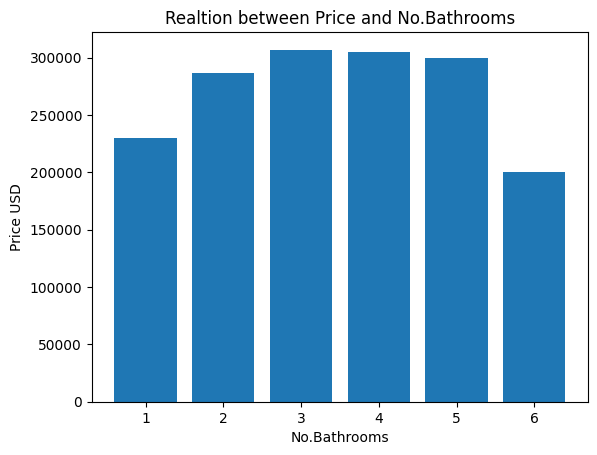

In [16]:
plt.bar(x=df["Bathrooms"], height=df["SalePrice"])
plt.xlabel("No.Bathrooms")
plt.ylabel("Price USD")
plt.title("Realtion between Price and No.Bathrooms")
plt.show();

## Data Preparing

In [17]:
# Split Data
target = "SalePrice"
X_train = df.drop(columns=target)
y_train = df[target]
X_train.shape, y_train.shape
X_train.head()


,LotArea,TotalBsmtSF,Bedrooms,Bathrooms
0,8450,856,3,4
1,9600,1262,3,3
2,11250,920,3,4
3,9550,756,3,2
4,14260,1145,4,4


## Building Model

### Baseline Model

In [18]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean : ", y_mean.round(2))
print("MAE: ", baseline_mae.round(2))

Mean :  163853.41
MAE:  42378.95


In [19]:
model = make_pipeline(SimpleImputer(),LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [20]:
y_pred_training = model.predict(X_train)
training_mae = mean_absolute_error(y_train, y_pred_training)
print("MAE of the training model = ", training_mae.round(2))

MAE of the training model =  25872.1


Our Model's mean absolute error is `25872.1` Which is far better than the baseline

## Evaluating

In [21]:
test.dropna(inplace=True)
test[["TotalBsmtSF", "Bathrooms"]] = test[["TotalBsmtSF", "Bathrooms"]].astype("int")

In [22]:
y_test_predction = model.predict(test)
y_test_predction

array([125290.61206931, 195305.97709183, 182502.2962431 , ...,
       173904.77682835, 153797.92078294, 185139.86064374])

## Communicate Results

In [23]:
# Function to predict user input
def make_prediction(area, BasmentSF, Bedrooms, Bathrooms):
  data = {
    "LotArea": area,
    "TotalBsmtSF": BasmentSF,
    "Bedrooms": Bedrooms,
    "Bathrooms": Bathrooms
  }
  df = pd.DataFrame(data, index=[0])
  prediction = model.predict(df).round(2)[0]
  return f"Predicted apartment price: ${prediction}"

In [24]:
make_prediction(1000, 100, 3, 2)

'Predicted apartment price: $78667.88'

⛵ **Interact Widget with function** `make_prediction`

In [26]:
# make an interact widget with make_prediction function

interact(make_prediction, area=(700, 2000, 100), BasmentSF=(0, 3000, 100), Bedrooms=(1, 4, 1), Bathrooms=(1, 4, 1));


interactive(children=(IntSlider(value=1300, description='area', max=2000, min=700, step=100), IntSlider(value=…

## Thank You ❤️❤️👍